In [26]:
%pylab inline

if True:
    matplotlib.use('pgf')
    matplotlib.rcParams.update({
        "font.family":
        "serif",  # use serif/main font for text elements
        "text.usetex": True,  # use inline math for ticks
        "axes.unicode_minus": False,
        "pgf.rcfonts":
        False,  # don't setup fonts from rc parameters
        "pgf.preamble": """
            \\usepackage{times}
            \\usepackage[T1]{fontenc}
            \\usepackage[utf8]{inputenc}
            \\usepackage{bm}
            \\usepackage{amsmath}
            \\usepackage{amssymb}
        """,
        "pgf.texsystem": "pdflatex",
    })

Populating the interactive namespace from numpy and matplotlib


In [27]:
def plot_vs_random(ax, game):
    def add_algo(algo):
        assert algo in ('escher', 'dream', 'nfsp')
        # All the algorithms share the same nodes file.
        nods = np.load(f'data/{game}/{game}_nodes_vs_random.npy')
        mean = np.load(f'data/{game}/{game}_{algo}_rews_vs_random.npy')
        sdev = np.load(f'data/{game}/{game}_{algo}_sems_vs_random.npy')

        mean = mean[:len(nods)]
        sdev = sdev[:len(nods)]

        (label, col, ls) = {
            'dream' : ('DREAM', 'red',    '--'),
            'nfsp'  : ('NFSP', 'purple', '-.'),
            'escher': ('ESCHER (Ours)' , 'blue',   '-' ),
        }[algo]

        ax.fill_between(nods, mean - sdev, mean + sdev, alpha=.25, facecolor=col)
        ax.plot(nods, mean - sdev, ls=ls, color=col, lw=0.2, alpha=.4)
        ax.plot(nods, mean + sdev, ls=ls, color=col, lw=0.2, alpha=.4)
        ax.plot(nods, mean, label=label, ls=ls, color=col)

        return (min(nods), max(nods))

    xlims = [np.inf,0]

    for algo in ('escher', 'dream', 'nfsp'):
        print(game, algo)
        minx, maxx = add_algo(algo)
        xlims[0] = min(xlims[0], minx)
        xlims[1] = max(xlims[1], maxx)

    game_name = game.replace('_', ' ').title()
    if game_name == "Pttt":
        game_name = "Phantom Tic-Tac-Toe"

    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:.0%}'.format((y + 1)/2))) 

    ax.set_title(game_name)
    ax.legend(loc=3,fontsize="small")
    ax.set_ylim(-1, 1)
    ax.grid()
    ax.set_xlim(*xlims)
    ax.axhline(color="#555", linewidth=0.5)
    ax.set_xlabel("Information sets touched")

In [28]:
def plot_head_to_head(ax, game):
    def add_algo(opponent):
        assert opponent in ('random', 'dream', 'nfsp')
        # All the algorithms share the same nodes file.
        nods = np.load(f'data/{game}/{game}_nodes_vs_{opponent}.npy')
        mean = np.load(f'data/{game}/{game}_escher_rews_vs_{opponent}.npy')
        sdev = np.load(f'data/{game}/{game}_escher_sems_vs_{opponent}.npy')

        mean = mean[:len(nods)]
        sdev = sdev[:len(nods)]

        (label, col, ls) = {
            'dream' : ('ESCHER vs DREAM', 'red',    '--'),
            'nfsp'  : ('ESCHER vs NFSP', 'purple', '-.'),
            # 'random': ('ESCHER vs Random' , 'blue',   '-' ),
        }[opponent]

        ax.fill_between(nods, mean - sdev, mean + sdev, alpha=.25, facecolor=col)
        ax.plot(nods, mean - sdev, ls=ls, color=col, lw=0.2, alpha=.4)
        ax.plot(nods, mean + sdev, ls=ls, color=col, lw=0.2, alpha=.4)
        ax.plot(nods, mean, label=label, ls=ls, color=col)

        return (min(nods), max(nods))

    xlims = [np.inf, 0]

    for opponent in ('nfsp', 'dream'):
        minx, maxx = add_algo(opponent)
        xlims[0] = min(xlims[0], minx)
        xlims[1] = max(xlims[1], maxx)

    game_name = game.replace('_', ' ').title()
    if game_name == "Pttt":
        game_name = "Phantom Tic-Tac-Toe"

    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:.0%}'.format((y + 1)/2))) 

    ax.set_title(game_name)
    ax.legend(loc=3,fontsize="small")
    ax.set_ylim(-1, 1)
    ax.grid()
    ax.set_xlim(*xlims)
    ax.axhline(y=50, color="#555", linewidth=0.5)
    ax.set_xlabel("Information sets touched")

pttt escher
pttt dream
pttt nfsp
dark_hex_5 escher
dark_hex_5 dream
dark_hex_5 nfsp
dark_chess escher
dark_chess dream
dark_chess nfsp


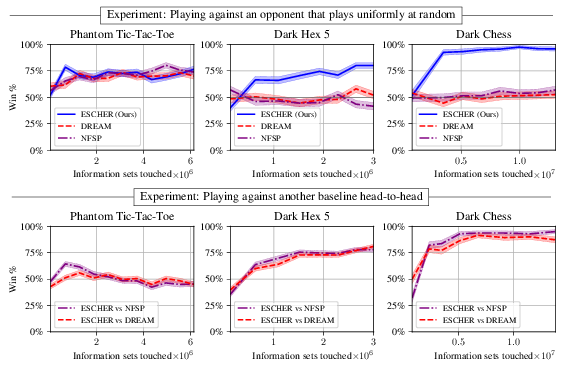

In [32]:
# fig, axs = plt.subplots(1, 3, figsize=(9,2.5))

fig = plt.figure(constrained_layout=True, figsize=(7.7,5))

(fig_random, fig_h2h) = fig.subfigures(2)

fig_random.suptitle('\\rule[1mm]{3.2cm}{.2mm}\\fbox{ Experiment: Playing against an opponent that plays uniformly at random }\\rule[1mm]{3.2cm}{.2mm}')
axs = fig_random.subplots(1, 3)
for ax, game in zip(axs, ['pttt', 'dark_hex_5', 'dark_chess']):
    plot_vs_random(ax, game)
axs[0].set_ylabel("Win \%")

fig_h2h.suptitle('\\rule[1mm]{4.3cm}{.2mm}\\fbox{ Experiment: Playing against another baseline head-to-head }\\rule[1mm]{4.3cm}{.2mm}')
axs = fig_h2h.subplots(1, 3)
for ax, game in zip(axs, ['pttt', 'dark_hex_5', 'dark_chess']):
    plot_head_to_head(ax, game)
axs[0].set_ylabel("Win \%")

fig.savefig("pdf/experiments_combined.pdf", bbox_inches="tight")